In [1]:
# grab the functions for making the measurements with the group data
include("../src/obs_funcs.jl")
import Jackknife.get_sdss_subvols

INFO: Recompiling stale cache file /home/users/kww231/.playground/share/phd/packages/lib/v0.6/InternedStrings.ji for module InternedStrings.
INFO: Recompiling stale cache file /home/users/kww231/.playground/share/phd/packages/lib/v0.6/CSV.ji for module CSV.
INFO: Recompiling stale cache file /home/users/kww231/.playground/share/phd/packages/lib/v0.6/Distributions.ji for module Distributions.
INFO: Recompiling stale cache file /home/users/kww231/.playground/share/phd/packages/lib/v0.6/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /home/users/kww231/.playground/share/phd/packages/lib/v0.6/Formatting.ji for module Formatting.
INFO: Recompiling stale cache file /home/users/kww231/.playground/share/phd/packages/lib/v0.6/NearestNeighbors.ji for module NearestNeighbors.


In [2]:
# build the data sample from the group finding catalog
# the function also finds the sample volumes from the redshift range
galdf, samplevols = load_groupdat()

(49353×46 DataFrames.DataFrame. Omitted printing of 40 columns
│ Row   │ foo    │ galid  │ groupid │ cenid  │ rband    │ Psat       │
├───────┼────────┼────────┼─────────┼────────┼──────────┼────────────┤
│ 1     │ PROB10 │ 99     │ 11864   │ 99     │ -18.7129 │ 0.0        │
│ 2     │ PROB10 │ 237    │ 12835   │ 237    │ -18.4337 │ 0.0        │
│ 3     │ PROB10 │ 1071   │ 9313    │ 1071   │ -19.0647 │ 0.0        │
│ 4     │ PROB10 │ 1142   │ 12588   │ 1142   │ -21.3599 │ 4.17232e-6 │
│ 5     │ PROB10 │ 1357   │ 13957   │ 1357   │ -18.3485 │ 0.0        │
│ 6     │ PROB10 │ 1687   │ 10907   │ 1687   │ -19.039  │ 0.0        │
│ 7     │ PROB10 │ 4422   │ 14275   │ 4422   │ -18.3114 │ 0.0        │
│ 8     │ PROB10 │ 4629   │ 13300   │ 4629   │ -18.458  │ 0.0        │
│ 9     │ PROB10 │ 4753   │ 10901   │ 4753   │ -18.7568 │ 0.0        │
│ 10    │ PROB10 │ 5129   │ 11911   │ 5129   │ -18.6018 │ 0.0        │
│ 11    │ PROB10 │ 5149   │ 10949   │ 5149   │ -18.707  │ 0.0        │
⋮
│ 49342 │ PR

In [3]:
# compute the jackknife subvolumes that our selected sample belongs to
radecs = zeros(size(galdf)[1], 2)
radecs[:, 1] = rad2deg.(galdf[:ra])
radecs[:, 2] = rad2deg.(galdf[:dec])

galdf[:jackvol] = get_sdss_subvols(radecs)

49353-element Array{Int64,1}:
  2
  2
 21
 11
 11
 16
 21
 11
 11
 16
 16
  6
 16
  ⋮
  7
  7
  7
  7
  7
  7
  7
  6
  6
  6
  6
  6

In [4]:
# define the galaxy mass samples with the following bin edges in log10(M*)
const nmbins = 4
const logMedges = [9.4, 9.8, 10.3, 10.6, 11.0]
const mlabels = [9.7, 10.1, 10.4, 10.7]  # these values are closest to the bin means/medians
const meanMs = Array{Float64}(nmbins)

for i in 1:nmbins
    meanM = mean(galdf[:log10M][logMedges[i] .<= galdf[:log10M] .< logMedges[i + 1]])
    meanMs[i] = meanM
end

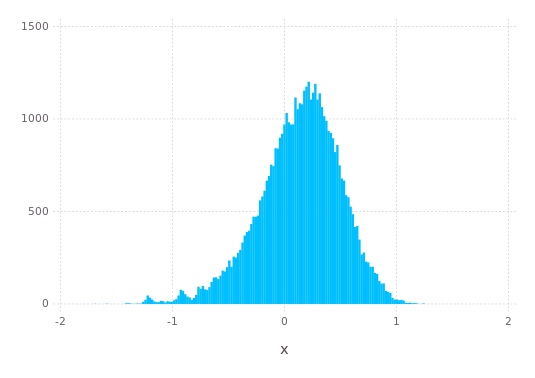

In [10]:
plot(x = log10.(galdf[:delta] + 1), Geom.histogram)

In [12]:
Array(linspace(-0.8, 1.0, 9))

9-element Array{Float64,1}:
 -0.8  
 -0.575
 -0.35 
 -0.125
  0.1  
  0.325
  0.55 
  0.775
  1.0  

In [5]:
# similarly, define the bin edges in log10(δ + 1)
const ndbins = 8
const dbinedges = Array(linspace(-0.8, 1.0, 9))
const dmeans = Array{Float64}(4, 8)

for i in 1:nmbins
    massdf = galdf[logMedges[i] .<= galdf[:log10M] .< logMedges[i + 1], :]
    for j in 1:ndbins
        meand = mean(massdf[:logρ][dbinedges[j] .<= massdf[:logρ] .< dbinedges[j + 1]])
        dmeans[i, j] =  meand
    end
end

logMₛ = 9.7
rₛ = 0.57
χ² = 7.3
χ²_ν = 1.2
p = 0.291
   
logMₛ = 10.1
rₛ = 0.71
χ² = 3.8
χ²_ν = 0.6
p = 0.702
   


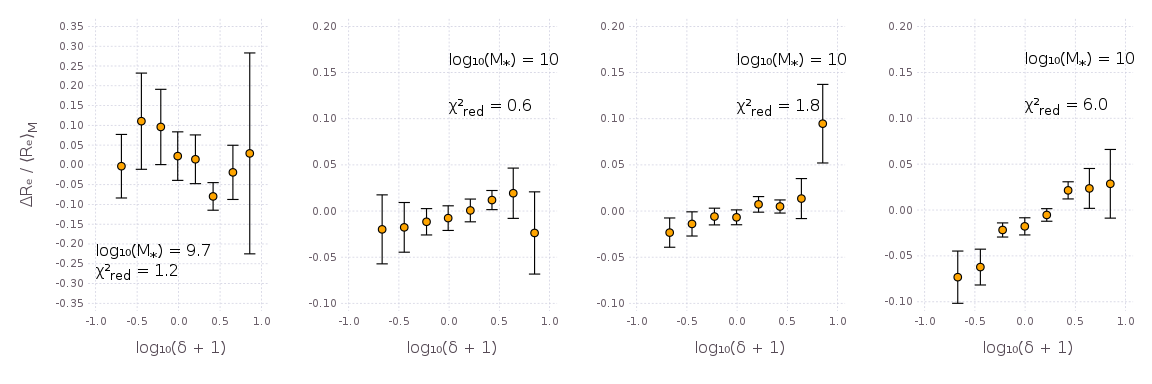

logMₛ = 10.4
rₛ = 0.76
χ² = 11.0
χ²_ν = 1.8
p = 0.088
   
logMₛ = 10.7
rₛ = 0.87
χ² = 36.0
χ²_ν = 6.0
p = 0.000
   


In [6]:
# now to plot some variations in galaxy properties
# start with the scale radius
galdf[:Rₑ] = galdf[:R_e]
yticks = [Array(-0.35:0.05:0.35), Array(-0.1:0.05:0.2), Array(-0.1:0.05:0.2), Array(-0.1:0.05:0.2)]
annotatevals = [[-1, 3], [0, 6], [0, 6], [0, 6]]
replot = massenv_plot(galdf, "Rₑ",
                      yticks, annotatevals,
                      dbinedges, dmeans,
                      ptcolor = "orange")


draw(SVG("finfigs/finplot_Re_d.svg", 12inch, 4inch), replot)  # an svg for the paper
draw(PDF("finfigs/finplot_Re_d.pdf", 12inch, 4inch), replot)  
draw(PNG("finfigs/finplot_Re_d.png", 12inch, 4inch), replot)
display("image/png", read("finfigs/finplot_Re_d.png"))

logMₛ = 9.7
rₛ = 0.86
χ² = 7.8
χ²_ν = 1.3
p = 0.255
   
logMₛ = 10.1
rₛ = 0.95
χ² = 10.9
χ²_ν = 1.8
p = 0.093
   
logMₛ = 10.4
rₛ = 0.94
χ² = 3.3
χ²_ν = 0.6
p = 0.770
   


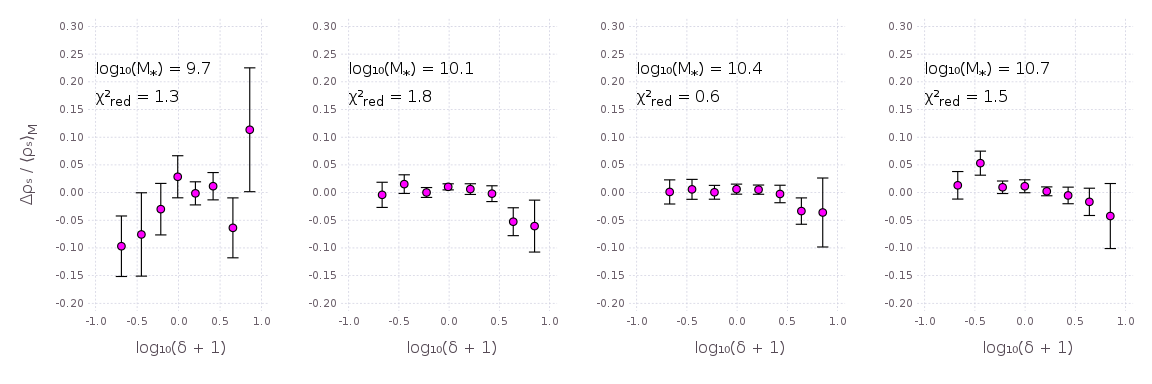

logMₛ = 10.7
rₛ = 0.97
χ² = 9.1
χ²_ν = 1.5
p = 0.167
   


In [7]:
# here's surface density at Rₑ/2
galdf[:ρₛ] = galdf[:surfdensR_eo2]
yticks = [Array(-0.2:0.05:0.3), Array(-0.2:0.05:0.3), Array(-0.2:0.05:0.3), Array(-0.2:0.05:0.3)]
annotatevals = [[-1, 9], [-1, 9], [-1, 9], [-1, 9]]
surfplot = massenv_plot(galdf, "ρₛ",
                        yticks, annotatevals,
                        dbinedges, dmeans,
                        ptcolor = "magenta")

draw(SVG("finfigs/finplot_surfdens_d.svg", 12inch, 4inch), surfplot)
draw(PDF("finfigs/finplot_surfdens_d.pdf", 12inch, 4inch), surfplot)
draw(PNG("finfigs/finplot_surfdens_d.png", 12inch, 4inch), surfplot)
display("image/png", read("finfigs/finplot_surfdens_d.png"))

logMₛ = 9.7
rₛ = 0.92
χ² = 2.8
χ²_ν = 0.5
p = 0.834
   
logMₛ = 10.1
rₛ = 0.95
χ² = 22.5
χ²_ν = 3.8
p = 0.001
   
logMₛ = 10.4
rₛ = 0.97
χ² = 34.4
χ²_ν = 5.7
p = 0.000
   


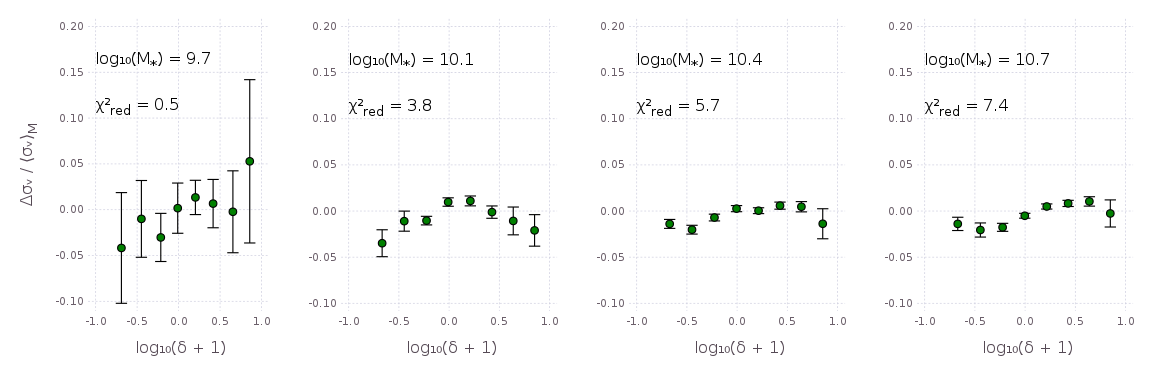

logMₛ = 10.7
rₛ = 0.96
χ² = 44.7
χ²_ν = 7.4
p = 0.000
   


In [8]:
# now for Dn4000
galdf[:σᵥ] = galdf[:vdisp]
yticks = [Array(-0.1:0.05:0.20), Array(-0.1:0.05:0.2), Array(-0.1:0.05:0.2), Array(-0.1:0.05:0.2)]
annotatevals = [[-1, 6], [-1, 6], [-1, 6], [-1, 6]]
vdispplot = massenv_plot(galdf, "σᵥ",
                         yticks, annotatevals,
                         dbinedges, dmeans,
                         ptcolor = "green")

draw(SVG("finfigs/finplot_vdisp_d.svg", 12inch, 4inch), vdispplot)
draw(PDF("finfigs/finplot_vdisp_d.pdf", 12inch, 4inch), vdispplot)
draw(PNG("finfigs/finplot_vdisp_d.png", 12inch, 4inch), vdispplot)
display("image/png", read("finfigs/finplot_vdisp_d.png"))

logMₛ = 9.7
rₛ = 0.97
χ² = 10.9
χ²_ν = 1.8
p = 0.092
   
logMₛ = 10.1
rₛ = 0.99
χ² = 12.4
χ²_ν = 2.1
p = 0.054
   
logMₛ = 10.4
rₛ = 0.98
χ² = 46.5
χ²_ν = 7.8
p = 0.000
   


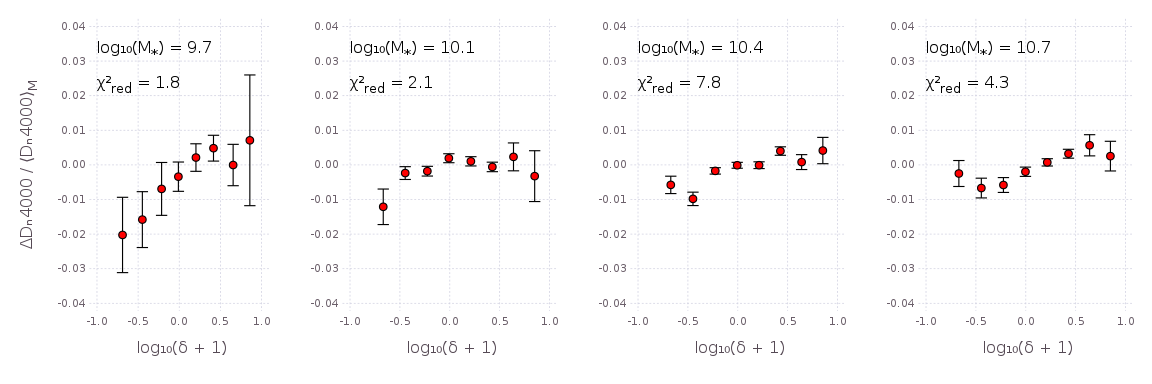

logMₛ = 10.7
rₛ = 0.91
χ² = 26.0
χ²_ν = 4.3
p = 0.000
   


In [9]:
# now for Dn4000
galdf[:Dₙ4000] = galdf[:Dn4000]
yticks = [Array(-0.04:0.01:0.04), Array(-0.04:0.01:0.04), Array(-0.04:0.01:0.04), Array(-0.04:0.01:0.04)]
annotatevals = [[-1, 8], [-1, 8], [-1, 8], [-1, 8]]
dn4kplot = massenv_plot(galdf, "Dₙ4000",
                        yticks, annotatevals,
                        dbinedges, dmeans,
                        ptcolor = "red")

draw(PDF("finfigs/fig1.pdf", 12inch, 4inch), dn4kplot)
draw(PNG("finfigs/finplot_Dn4000_d.png", 12inch, 4inch), dn4kplot)
display("image/png", read("finfigs/finplot_Dn4000_d.png"))